# Tutorial 

This tutorial is supposed to facilitate the analysis of the logged experiments

### Loading the libraries

In [1]:
import os 
import pickle
import sys
import json


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


from plot_utils import PlotUtils

## Loading the paths 

You should load the paths both for the baselines and the LLAMBO experiments

In [2]:
dataset = 'blood_transfusion'
model_name = "nn"


In [3]:
algorithms =  [
    'TPE (Random init)',
    'SKOPT (Random init)', 
    'Optuna (Random init)',
    'SMAC (Random init)'
]

In [4]:
path_baseline_experiments = 'demo_data/baselines/blood_transfusion_nn'
path_llambo_experiment = 'demo_data/lambo_extended/blood_transfusion_nn_ei/'

In [5]:
paths_baselines = [os.path.join(
    path_baseline_experiments, algo, 'averaged_accuracies_from_pickle.csv'
    ) for algo in algorithms
]


In [6]:
paths_and_labels = [{
    'path': path, 
    'label' : label.split(' ')[0], 
    'type': 'csv'
    } for path, label in zip(paths_baselines, algorithms)
]

paths_and_labels = paths_and_labels + [
    
    {'path': os.path.join(path_llambo_experiment, 'averaged_accuracies.csv'), 
     'label': 'LLAMBO (Gemma2-2b-it) EI', 'type': 'csv'
    }
]

In [7]:
paths_and_labels

[{'path': 'demo_data/baselines/blood_transfusion_nn/TPE (Random init)/averaged_accuracies_from_pickle.csv',
  'label': 'TPE',
  'type': 'csv'},
 {'path': 'demo_data/baselines/blood_transfusion_nn/SKOPT (Random init)/averaged_accuracies_from_pickle.csv',
  'label': 'SKOPT',
  'type': 'csv'},
 {'path': 'demo_data/baselines/blood_transfusion_nn/Optuna (Random init)/averaged_accuracies_from_pickle.csv',
  'label': 'Optuna',
  'type': 'csv'},
 {'path': 'demo_data/baselines/blood_transfusion_nn/SMAC (Random init)/averaged_accuracies_from_pickle.csv',
  'label': 'SMAC',
  'type': 'csv'},
 {'path': 'demo_data/lambo_extended/blood_transfusion_nn_ei/averaged_accuracies.csv',
  'label': 'LLAMBO (Gemma2-2b-it) EI',
  'type': 'csv'}]

## Plotting the accuracy over time


Processing: TPE (File: demo_data/baselines/blood_transfusion_nn/TPE (Random init)/averaged_accuracies_from_pickle.csv)
  Successfully plotted average_accuracy for TPE.

Processing: SKOPT (File: demo_data/baselines/blood_transfusion_nn/SKOPT (Random init)/averaged_accuracies_from_pickle.csv)
  Successfully plotted average_accuracy for SKOPT.

Processing: Optuna (File: demo_data/baselines/blood_transfusion_nn/Optuna (Random init)/averaged_accuracies_from_pickle.csv)
  Successfully plotted average_accuracy for Optuna.

Processing: SMAC (File: demo_data/baselines/blood_transfusion_nn/SMAC (Random init)/averaged_accuracies_from_pickle.csv)
  Successfully plotted average_accuracy for SMAC.

Processing: LLAMBO (Gemma2-2b-it) EI (File: demo_data/lambo_extended/blood_transfusion_nn_ei/averaged_accuracies.csv)
  Successfully plotted average_accuracy for LLAMBO (Gemma2-2b-it) EI.


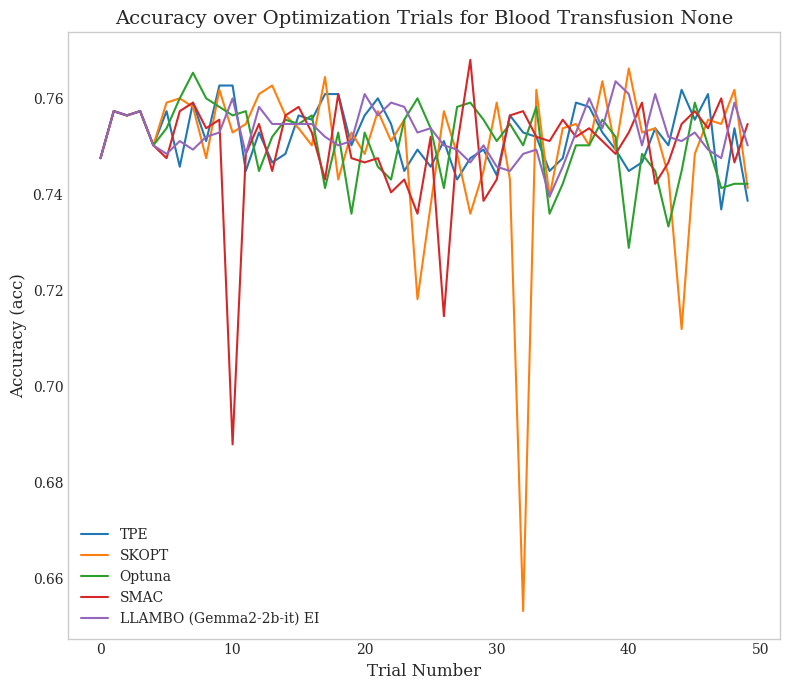

In [8]:
PlotUtils.plot_accuracy_comparison(
    paths_and_labels=paths_and_labels, 
    column_plot='average_accuracy', 
    total_trials=50
)

As you can notice, it can be quite noisy. Therefore we could also consider smoothening the plots

## Smoothing the window


Processing: TPE (File: demo_data/baselines/blood_transfusion_nn/TPE (Random init)/averaged_accuracies_from_pickle.csv)
  Applied smoothing with window 5 for TPE.
  Successfully plotted average_accuracy for TPE.

Processing: SKOPT (File: demo_data/baselines/blood_transfusion_nn/SKOPT (Random init)/averaged_accuracies_from_pickle.csv)
  Applied smoothing with window 5 for SKOPT.
  Successfully plotted average_accuracy for SKOPT.

Processing: Optuna (File: demo_data/baselines/blood_transfusion_nn/Optuna (Random init)/averaged_accuracies_from_pickle.csv)
  Applied smoothing with window 5 for Optuna.
  Successfully plotted average_accuracy for Optuna.

Processing: SMAC (File: demo_data/baselines/blood_transfusion_nn/SMAC (Random init)/averaged_accuracies_from_pickle.csv)
  Applied smoothing with window 5 for SMAC.
  Successfully plotted average_accuracy for SMAC.

Processing: LLAMBO (Gemma2-2b-it) EI (File: demo_data/lambo_extended/blood_transfusion_nn_ei/averaged_accuracies.csv)
  Applied

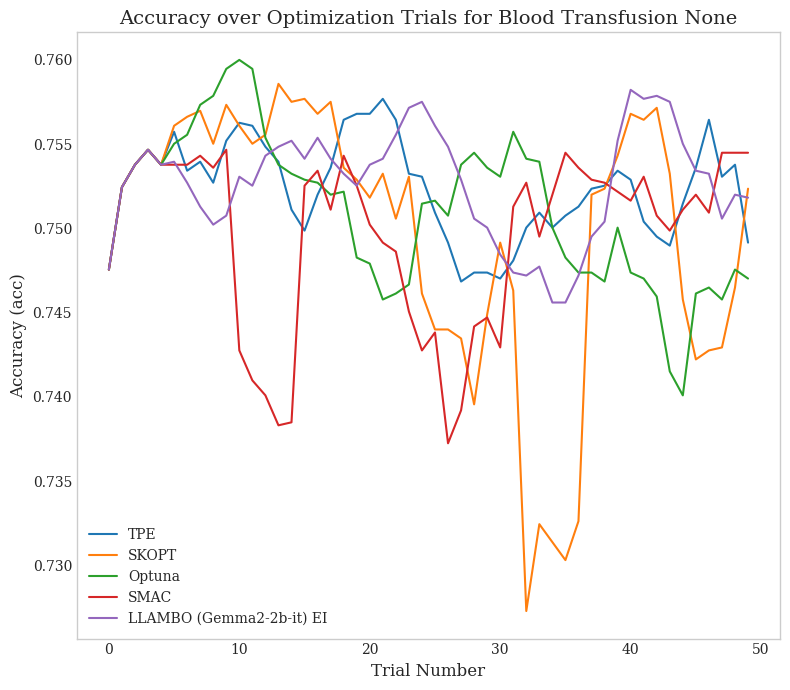

In [9]:
PlotUtils.plot_accuracy_comparison(
    paths_and_labels=paths_and_labels, 
    column_plot='average_accuracy', 
    total_trials=50, 
    smoothing_window=5
)

Slightly more visible, but it can alter the spikes. Thus we should also consider observing the best accuracy during the trials

## Best Accuracy over Time


Processing: TPE (File: demo_data/baselines/blood_transfusion_nn/TPE (Random init)/averaged_accuracies_from_pickle.csv, Type: csv)
  DataFrame successfully loaded from CSV for TPE.
  Data truncated to first 50 trials for TPE.
  Applied cumulative maximum to accuracy for TPE.
  Applied smoothing with window 5 for TPE.
  Successfully plotted 'acc' for TPE.

Processing: SKOPT (File: demo_data/baselines/blood_transfusion_nn/SKOPT (Random init)/averaged_accuracies_from_pickle.csv, Type: csv)
  DataFrame successfully loaded from CSV for SKOPT.
  Data truncated to first 50 trials for SKOPT.
  Applied cumulative maximum to accuracy for SKOPT.
  Applied smoothing with window 5 for SKOPT.
  Successfully plotted 'acc' for SKOPT.

Processing: Optuna (File: demo_data/baselines/blood_transfusion_nn/Optuna (Random init)/averaged_accuracies_from_pickle.csv, Type: csv)
  DataFrame successfully loaded from CSV for Optuna.
  Data truncated to first 50 trials for Optuna.
  Applied cumulative maximum to ac

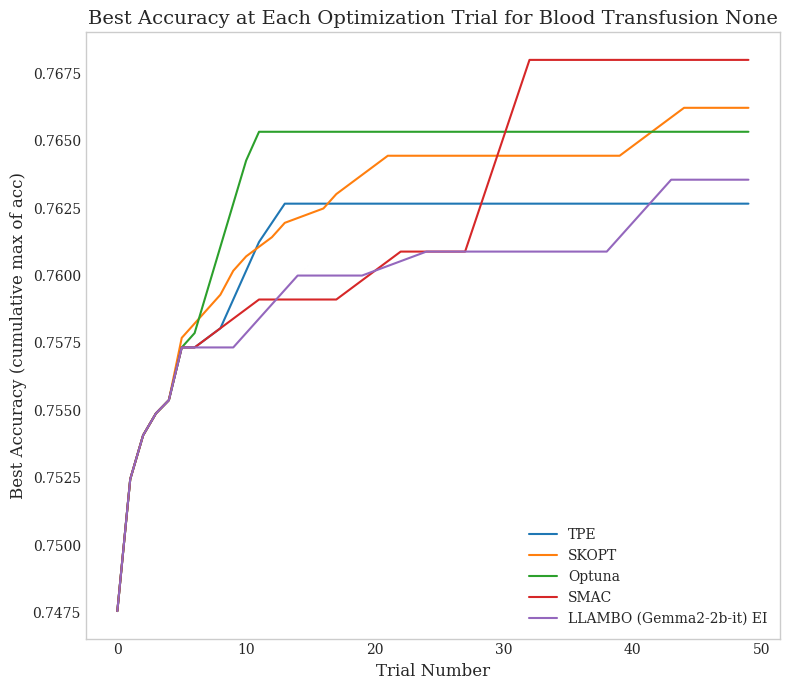

In [10]:
PlotUtils.plot_best_accuracy_comparison(
    paths_and_labels=paths_and_labels, 
    column_plot='average_accuracy', 
    total_trials=50, 
    smoothing_window=5
)

## Plotting the Regret


Processing Regret for: TPE (File: demo_data/baselines/blood_transfusion_nn/TPE (Random init)/averaged_accuracies_from_pickle.csv)
  Regret for TPE - Observed Min: 0.7324, Max: 0.7627, Range: 0.0302
  Successfully plotted regret for TPE.

Processing Regret for: SKOPT (File: demo_data/baselines/blood_transfusion_nn/SKOPT (Random init)/averaged_accuracies_from_pickle.csv)
  Regret for SKOPT - Observed Min: 0.6533, Max: 0.7662, Range: 0.1129
  Successfully plotted regret for SKOPT.

Processing Regret for: Optuna (File: demo_data/baselines/blood_transfusion_nn/Optuna (Random init)/averaged_accuracies_from_pickle.csv)
  Regret for Optuna - Observed Min: 0.7289, Max: 0.7653, Range: 0.0364
  Successfully plotted regret for Optuna.

Processing Regret for: SMAC (File: demo_data/baselines/blood_transfusion_nn/SMAC (Random init)/averaged_accuracies_from_pickle.csv)
  Regret for SMAC - Observed Min: 0.6880, Max: 0.7680, Range: 0.0800
  Successfully plotted regret for SMAC.

Processing Regret for: 

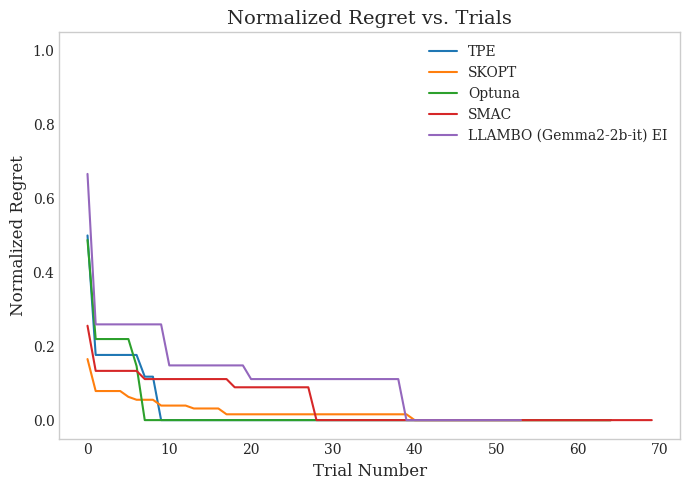

In [11]:
PlotUtils.plot_regret_comparison(
    paths_and_labels=paths_and_labels, 
    column_plot='average_accuracy', 
)

Wonderful, now let's dive deeper into the attention mechanism

## Loading attention vectors

In [12]:
path_attention = os.path.join(path_llambo_experiment, '0acq_attention_vectors.jsonl')

In [13]:
attention_data_loaded = []

with open(path_attention, 'r') as f_jsonl:
    for line in f_jsonl:
        record = json.loads(line)
        if 'attention_matrix' in record and record['attention_matrix'] is not None:
            record['attention_matrix'] = np.array(record['attention_matrix'])
        attention_data_loaded.append(record)

## Plotting attention heatmap

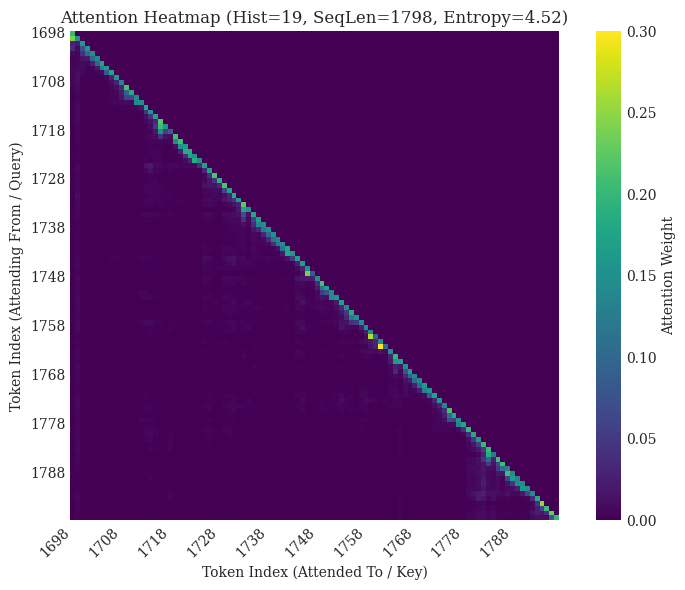

In [14]:
record_to_plot = attention_data_loaded[3] # Example: choose a record

if 'attention_matrix' in record_to_plot and record_to_plot['attention_matrix'] is not None:
    full_matrix = record_to_plot['attention_matrix']
    hist = record_to_plot.get('n_history', 'N/A')
    seq_len = record_to_plot.get('seq_len', full_matrix.shape[0])
    entropy= record_to_plot.get('entropy')


    PlotUtils.plot_attention_heatmap_focused(
        attention_matrix=full_matrix,
        num_tokens_to_show=100, # Focus on last 500x500
        title=f"Attention Heatmap (Hist={hist}, SeqLen={seq_len}, Entropy={entropy:.2f})",
        cmap='viridis',
        global_scale_vmin=0.0, # Explicitly set 0-1 scale
        global_scale_vmax=0.3
    )



Maybe you want to focus only on the last specific tokens

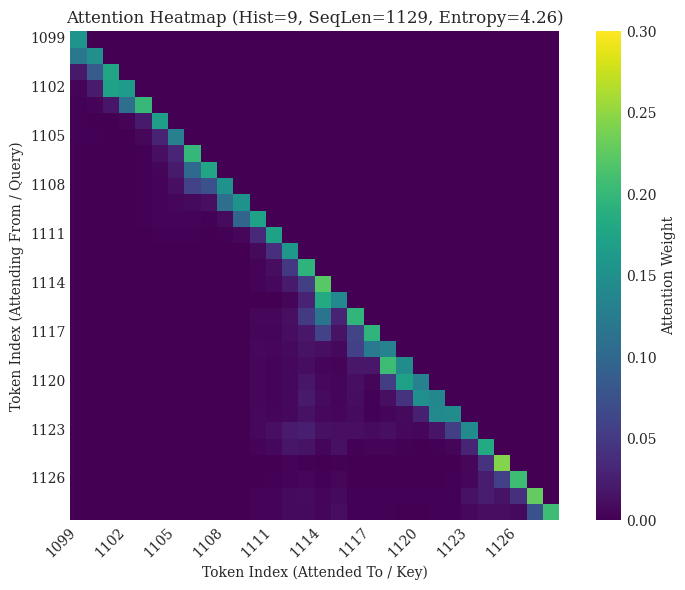

In [15]:
record_to_plot = attention_data_loaded[1] # Example: choose a record

if 'attention_matrix' in record_to_plot and record_to_plot['attention_matrix'] is not None:
    full_matrix = record_to_plot['attention_matrix']
    hist = record_to_plot.get('n_history', 'N/A')
    seq_len = record_to_plot.get('seq_len', full_matrix.shape[0])
    entropy= record_to_plot.get('entropy')


    PlotUtils.plot_attention_heatmap_focused(
        attention_matrix=full_matrix,
        num_tokens_to_show=30, # Focus on last 500x500
        title=f"Attention Heatmap (Hist={hist}, SeqLen={seq_len}, Entropy={entropy:.2f})",
        cmap='viridis',
        global_scale_vmin=0.0, # Explicitly set 0-1 scale
        global_scale_vmax=0.3
    )


## Top 20 tokens

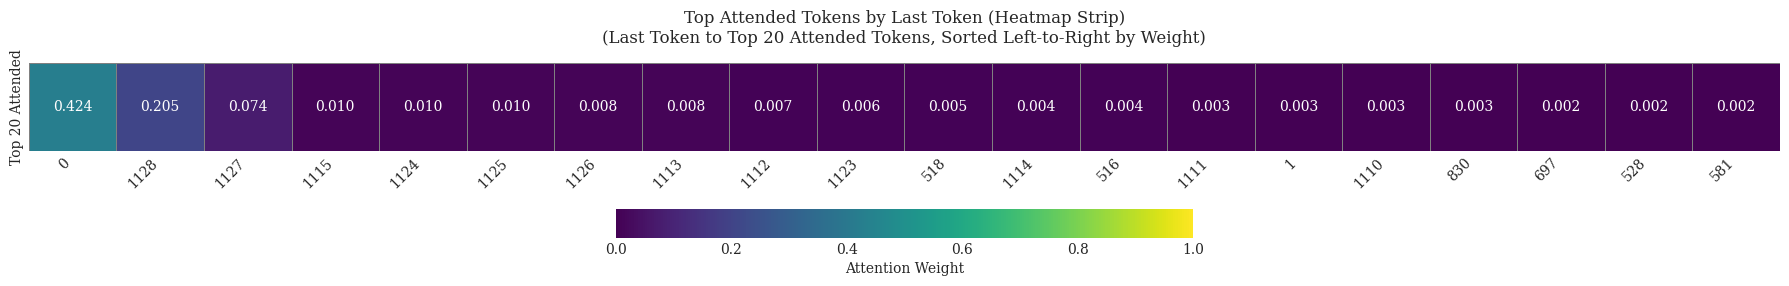

In [17]:
record = attention_data_loaded[1]


if 'attention_matrix' in record and record['attention_matrix'] is not None:
    full_attention_matrix = record['attention_matrix']
    if full_attention_matrix.ndim == 2 and full_attention_matrix.shape[0] > 0:
        last_token_attention_dist = full_attention_matrix[-1, :]
        seq_len_for_this_record = record.get('seq_len', len(last_token_attention_dist))

        

        PlotUtils.plot_top_attended_tokens_as_heatmap_strip(
            last_token_attention_dist,
            num_top_tokens_to_show=20, # Show the top 15 most attended-to tokens
            original_seq_len=seq_len_for_this_record,
            # token_id_to_string_fn=dummy_tokenizer_fn, # Pass your lookup function
            cmap='viridis' # Example colormap
        )



## Visualising Entropy


--- Raw Data Sample ---
   n_history   entropy  seq_len
0          5  4.157166      864
1          5  4.186600      864
2          5  4.157166      864
3          5  4.186600      864
4          5  4.157166      864
----------------------

Aggregating data by 'n_history'...

--- Aggregated Data ---
    n_history      mean       std  count
0           5  4.171883  0.015513     10
1           6  4.210694  0.038823     10
2           7  4.256991  0.020433     40
3           8  4.268071  0.041457     10
4           9  4.249386  0.014560     10
5          10  4.175434  0.003877     10
6          11  4.264925  0.002180     10
7          12  4.359698  0.006534     10
8          13  4.311923  0.028036     10
9          14  4.318644  0.017120     10
10         15  4.410086  0.011898     10
11         16  4.355307  0.010545     10
12         17  4.432250  0.057923     10
13         18  4.425299  0.083511     10
14         19  4.543343  0.024492     10
15         20  4.515645  0.006709     10
16

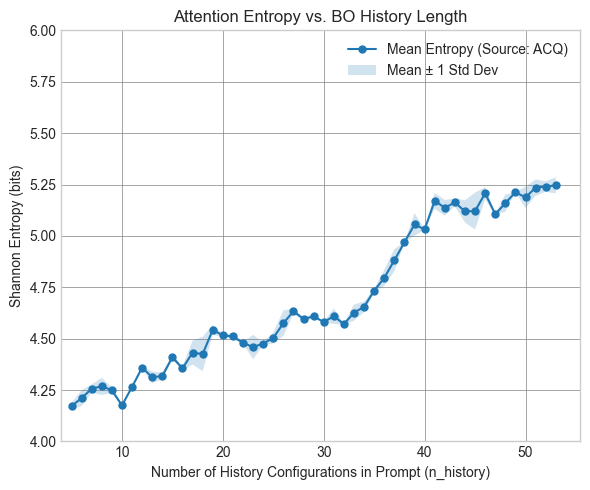

In [18]:
PlotUtils.plot_entropy(os.path.join(path_llambo_experiment, '0_search_info.json'))